# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


Draw a dispersion diagram (scatter plot) for the data.

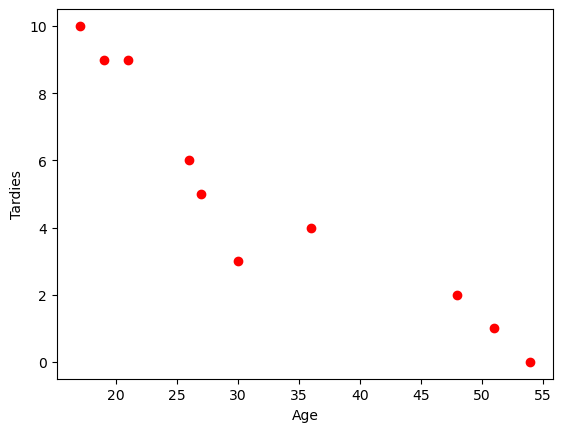

In [4]:
# Your code here
plt.plot(student_data["Age"],student_data["Tardies"], "ro")
plt.xlabel("Age")
plt.ylabel("Tardies");

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

-- The hypothesis seems true: the younger the students, the later they seem to be

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# your code here
cov = student_data.cov()
corr = student_data.corr()

print(f"Covariance = {cov.iloc[0,1]:.5f}\nCorrelation = {corr.iloc[0,1]:.5f}")

"""
A negative covariance shows that when one variable increases, the othe variable decreases and viceversa. It does not show how strong this relation is, though.
A negative correlation also shows an opposite relation of the two variables. The closer the correlation is to -1, the stronger the relation.
In this case, the correlation is very close to -1, which shows that Age and Tardies have a strong negative relation 
""";

Covariance = -45.56667
Correlation = -0.93916


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [40]:
# your explanation here
sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2)
a0,a1 = fmin(sse, [0,1], args=(student_data["Age"], student_data["Tardies"]))

Optimization terminated successfully.
         Current function value: 13.319202
         Iterations: 88
         Function evaluations: 165


Plot your regression model on your scatter plot.

y = 12.888761636047594 * x + -0.24281919420687842


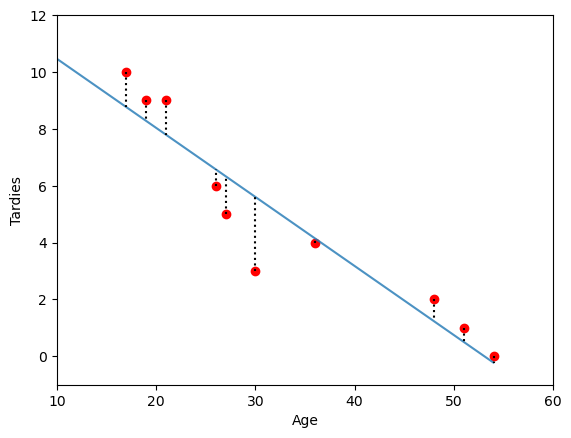

In [41]:
# Your code here.
# Plot the data
plt.plot(student_data["Age"], student_data["Tardies"], 'ro')

# Add the regression line, colored in blue
plt.plot([0,student_data["Age"].max()], [a0, a0+a1*student_data["Age"].max()], alpha=0.8) # This plots a line between [x=0,y=a0] and [x=54,y=a0+a1*54]. alpha=0.8 makes the line 20% transparent

# Add pointed black line to illustrate the errors
for xi, yi in zip(student_data["Age"],student_data["Tardies"]):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") 

# Restrict the domain
plt.xlim(10, 60)
plt.ylim(-1, 12)

# Add labels
plt.xlabel("Age")
plt.ylabel("Tardies")

print(f"y = {a0} * x + {a1}")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

-- It does look like age is a good predictor of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

In [9]:
display(vehicles.head())
vehicles.info()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [63]:
# Your code here.
vehicles_analysis = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]]
corr = vehicles_analysis.corr()["CO2 Emission Grams/Mile"]
display(corr)

"""
Fuel Barrels/Year shows the strongest correlation, while Year shows the weakest
""";

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [60]:
# Your code here.
# sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2)
# results = []
# for category in vehicles_analysis.columns:
#     a0,a1 = fmin(sse, [0,1], args=(vehicles_analysis["CO2 Emission Grams/Mile"], vehicles_analysis[category]))
#     max_column_value = vehicles_analysis[category].max()
#     results.append((a0,a1,max_column_value, category))

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
X_train = vehicles_analysis.iloc[:,:-1]
y_train = vehicles_analysis.iloc[:,-1]
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

769.8882836465659 [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [64]:
# Your code here.
display(results)

"""
From the coefficients we obtained, we could think that the most important variable could be "Fuel Barrels/Year", since it's the biggest of them all.
But in reality, since this model has not been standardized, we can't really affirm that with 100% certainty
"""


[(2009.6668149760703, -0.018830427971113627, 2017, 'Year'),
 (0.4927726696200575, 0.011092194397432666, 16.0, 'Cylinders'),
 (0.0210200013951465,
  0.03700281775363053,
  47.08714285714285,
  'Fuel Barrels/Year'),
 (38.833481772193196, -0.03977173001559625, 56, 'Combined MPG'),
 (8.631250804881343, 3.9636071018498042, 5800, 'Fuel Cost/Year'),
 (0.0, 1.0, 1269.571428571429, 'CO2 Emission Grams/Mile')]

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [14]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [15]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*